In [1]:
#퀴즈
#빅데이터 분석을 위한 다른 종류의 그래프를 2개 이상 생성(파이그래프 포함) 하고 설명하는 코드를 github에 업로드
#1 데이터를 pandas형식으로 전환하기
#2 binning 수행하여 컬럼 추가하기
#3 get_dummies()함수를 활용하여 컬럼 추가하기
#4 NaN 데이터가있는지 확인하고 있다면 삭제 또는 min/max 알고리즘 적용하여 데이터프레임 업데이트하기

In [2]:
#퀴즈 1
import numpy as np
import pandas as pd
import networkx as nx

csv_data = pd.read_csv("house.csv",engine = 'python')
csv_data

,자료기준,일반가구수,주택수(계),단독주택,아파트,연립,다세대,주택보급률
0,2019년 12월,109912,112651,30049,58578,3766,15913,102.49%
1,2018년 12월,108757,108683,30018,55043,3750,15680,108.30%
2,2017년 12월,100308,100565,26314,54863,2910,12650,100.30%
3,2016년 12월,106328,101022,34110,50568,3682,10773,95.32%
4,2015년 12월,105212,100544,34081,50239,3682,10343,95.56%
5,2014년 12월,101544,97719,34513,47621,3682,9955,96.20%
6,2013년 12월,105836,97670,34661,48020,3703,9199,92.30%
7,2012년 12월,98406,94215,34658,45626,3659,8364,96.00%
8,2011년 12월,96715,99755,36209,50228,2945,8476,103.00%


In [3]:
#퀴즈 2
group_names = ['적다','보통','많다']
csv_data['다세대보급률'],mybin = pd.cut(csv_data['다세대'],3,labels=group_names,retbins=True)
csv_data


,자료기준,일반가구수,주택수(계),단독주택,아파트,연립,다세대,주택보급률,다세대보급률
0,2019년 12월,109912,112651,30049,58578,3766,15913,102.49%,많다
1,2018년 12월,108757,108683,30018,55043,3750,15680,108.30%,많다
2,2017년 12월,100308,100565,26314,54863,2910,12650,100.30%,보통
3,2016년 12월,106328,101022,34110,50568,3682,10773,95.32%,적다
4,2015년 12월,105212,100544,34081,50239,3682,10343,95.56%,적다
5,2014년 12월,101544,97719,34513,47621,3682,9955,96.20%,적다
6,2013년 12월,105836,97670,34661,48020,3703,9199,92.30%,적다
7,2012년 12월,98406,94215,34658,45626,3659,8364,96.00%,적다
8,2011년 12월,96715,99755,36209,50228,2945,8476,103.00%,적다


In [4]:
print(mybin)

[ 8356.451      10880.33333333 13396.66666667 15913.        ]


In [5]:
#퀴즈 3
csv_data = pd.concat([csv_data, pd.get_dummies(csv_data['다세대보급률'])],axis=1,sort=False)
csv_data

,자료기준,일반가구수,주택수(계),단독주택,아파트,연립,다세대,주택보급률,다세대보급률,적다,보통,많다
0,2019년 12월,109912,112651,30049,58578,3766,15913,102.49%,많다,0,0,1
1,2018년 12월,108757,108683,30018,55043,3750,15680,108.30%,많다,0,0,1
2,2017년 12월,100308,100565,26314,54863,2910,12650,100.30%,보통,0,1,0
3,2016년 12월,106328,101022,34110,50568,3682,10773,95.32%,적다,1,0,0
4,2015년 12월,105212,100544,34081,50239,3682,10343,95.56%,적다,1,0,0
5,2014년 12월,101544,97719,34513,47621,3682,9955,96.20%,적다,1,0,0
6,2013년 12월,105836,97670,34661,48020,3703,9199,92.30%,적다,1,0,0
7,2012년 12월,98406,94215,34658,45626,3659,8364,96.00%,적다,1,0,0
8,2011년 12월,96715,99755,36209,50228,2945,8476,103.00%,적다,1,0,0


In [16]:
#퀴즈 4
csv_data['다세대'] = csv_data['다세대']/csv_data['다세대'].max()

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

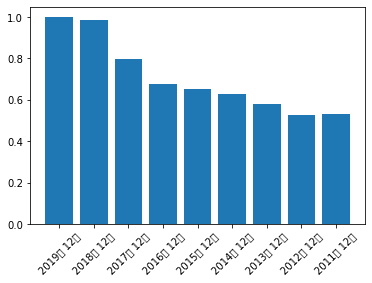

In [17]:
#그래프
import matplotlib.pyplot as plt
plt.bar(csv_data['자료기준'], csv_data['다세대'])
plt.xticks(rotation =  45 )